<a href="https://colab.research.google.com/github/RiaKokate/GIS/blob/main/gisPy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Student: Ria Kokate

# Project- Suicides in India



In [321]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [322]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #visualization
import geopandas as gpd #gis-maps lib

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib
from matplotlib import cm #colormap
import seaborn as sns

sns.set_style("dark")

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [323]:
#!python --version
gpd.__version__

'1.0.1'

#Mapping

In [324]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O IND.zip https://docs.google.com/uc?id=1Dnztw_oqA4mfdYj59XSgPfRIaxDMoqss&export=download
! wget -q -O suicide.csv https://docs.google.com/uc?id=11jdxcIEeU4S6Fcpw62OHua9H1mb43rue&export=download
! wget -q -O population.csv https://docs.google.com/uc?id=1RIJywocBfPJOzRanhQnogw0jixP4xtMT&export=download

zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
IND= gpd.read_file('INDIA-MAP.shp')

# Display the first few rows of the shapefile to understand its structure
print(IND.head())

   objectid statecode    statename state_ut distcode    distname  distarea  \
0         1        05  Uttarakhand    STATE      066    Nainital    4251.0   
1         2        05  Uttarakhand    STATE      060    Dehradun    3088.0   
2         3        05  Uttarakhand    STATE      064      Almora    3144.0   
3         4        05  Uttarakhand    STATE      065   Champawat    1766.0   
4         5        05  Uttarakhand    STATE      056  Uttarkashi    8016.0   

   totalpopul   totalhh  totpopmale  totpopfema    st_areasha     st_lengths  \
0    954605.0  191383.0    493666.0    460939.0  5.322546e+09  506182.695952   
1   1696694.0  347001.0    892199.0    804495.0  4.177236e+09  578188.681639   
2    622506.0  140577.0    291081.0    331425.0  4.140751e+09  463454.225766   
3    259648.0   53953.0    131125.0    128523.0  2.294297e+09  314508.010612   
4    330086.0   67602.0    168597.0    161489.0  1.085166e+10  786425.588972   

                                            geomet

<Axes: >

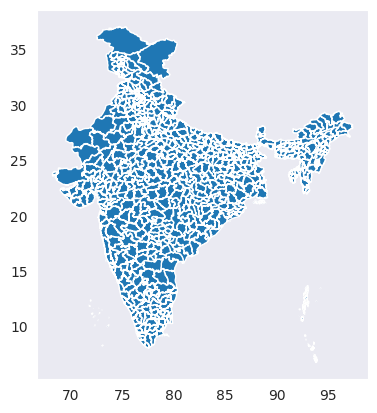

In [325]:
IND.plot()

<Axes: >

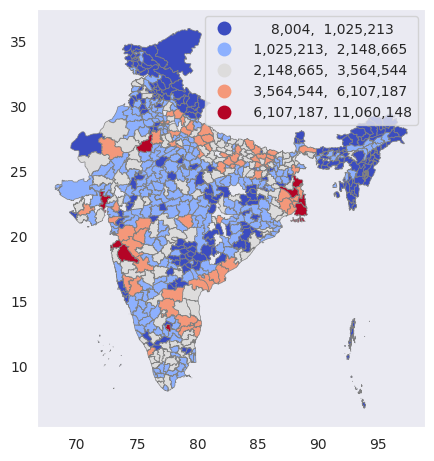

In [326]:
IND.plot(figsize=(5,6),column='totalpopul',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
#Ind.dtypes

In [327]:
# Load the disaster dataset
sdata = pd.read_csv('suicide.csv')

In [328]:
sdata.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [329]:
sdata = sdata.drop(sdata[sdata.Total==0].index)

print("After Total = 0 is dropped",sdata['Type_code'].unique())

sdata = sdata.drop(sdata[(sdata['State'] == 'Total (Uts)') | (sdata['State'] == 'Total (All India)') |
               (sdata['State'] == 'Total (States)') | (sdata['State'] == 'D & N Haveli') ].index)

print("After Amb. States are dropped",sdata['Type_code'].unique())

sdata = sdata.drop(sdata[(sdata['Age_group'] == '0-100+')].index)

print("After Age Group Amb is dropped",sdata['Type_code'].unique())

sdata['State'].replace({'A & N Islands':'Andaman & Nicobar Island',
                        'Delhi (Ut)':'NCT of Delhi',
                       }, inplace = True)

IND.rename(columns = {'st_nm':'State'}, inplace = True)
IND['statename'].replace({'Telangana':'Andhra Pradesh'
                       }, inplace = True)

After Total = 0 is dropped ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
After Amb. States are dropped ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
After Age Group Amb is dropped ['Causes' 'Means_adopted' 'Professional_Profile']


#Agewise Suicide Mapping

Young Age



In [330]:
sdata_agegroup = sdata.groupby(['Age_group','State']).sum()
sdata_agegroup

Year  \
Age_group State                               
0-14      Andaman & Nicobar Island   166510   
          Andhra Pradesh            1259889   
          Arunachal Pradesh          174580   
          Assam                      708241   
          Bihar                      702218   
...                                     ...   
60+       Tamil Nadu                1739764   
          Tripura                    559846   
          Uttar Pradesh             1510845   
          Uttarakhand                407352   
          West Bengal               1460485   

                                                                            Type_code  \
Age_group State                                                                         
0-14      Andaman & Nicobar Island  CausesCausesCausesCausesMeans_adoptedMeans_ado...   
          Andhra Pradesh            CausesCausesCausesCausesCausesCausesCausesCaus...   
          Arunachal Pradesh         CausesCausesMeans_adoptedMeans_adoptedMeans_ad...   
          Assam                     CausesCausesCausesCausesCausesCausesCausesCaus...   
          Bihar                     CausesCausesCausesCausesCausesCausesCausesCaus...   
...                                                                               ...   
60+       Tamil Nadu                CausesCausesCausesCausesCausesCausesCausesCaus...   
          Tripura                   CausesCausesCausesCausesCausesCausesCausesCaus...   
          Uttar Pradesh             CausesCausesCausesCausesCausesCausesCausesCaus...   
          Uttarakhand               CausesCausesCausesCausesCausesMeans_adoptedMea...   
          West Bengal               CausesCausesCausesCausesCausesCausesCausesCaus...   

                                                                                 Type  \
Age_group State                                                                         
0-14      Andaman & Nicobar Island  Love AffairsOther Causes (Please Specity)Other...   
          Andhra Pradesh            PovertyFailure in ExaminationFamily ProblemsIl...   
          Arunachal Pradesh         Causes Not knownCauses Not knownBy HangingBy H...   
          Assam                     Other Prolonged IllnessFailure in ExaminationO...   
          Bihar                     Failure in ExaminationIllegitimate PregnancyOt...   
...                                                                               ...   
60+       Tamil Nadu                CancerBankruptcy or Sudden change in EconomicP...   
          Tripura                   CancerOther Prolonged IllnessCauses Not knownP...   
          Uttar Pradesh             Other Prolonged IllnessUnemploymentOther Cause...   
          Uttarakhand               Insanity/Mental IllnessOther Prolonged Illness...   
          West Bengal               Other Prolonged IllnessFall in Social Reputati...   

                                                                               Gender  \
Age_group State                                                                         
0-14      Andaman & Nicobar Island  FemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFe...   
          Andhra Pradesh            FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...   
          Arunachal Pradesh         FemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFe...   
          Assam                     FemaleFemaleFemaleFemaleFemaleMaleMaleMaleMale...   
          Bihar                     FemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMa...   
...                                                                               ...   
60+       Tamil Nadu                FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...   
          Tripura                   FemaleFemaleFemaleFemaleFemaleFemaleFemaleMale...   
          Uttar Pradesh             FemaleFemaleFemaleFemaleFemaleFemaleFemaleFema...   
          Uttarakhand               FemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMa...   
          West Bengal               FemaleF

<Axes: >

Text(0.5, 1.0, 'Suicide Cases per State (Young)')

([], [])

([], [])

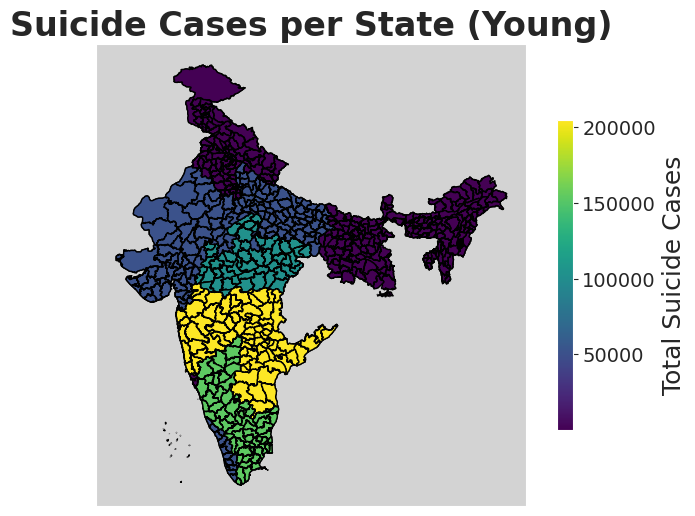

In [331]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# Assuming `sdata_agegroup` and `india` DataFrames are already defined

# Calculate the range for younger and elder groups
each_age_range = sdata_agegroup.shape[0] // sdata['Age_group'].nunique()

# Merge data
suicide_map_younger = india.merge(sdata_agegroup[:each_age_range*2], left_on='statename', right_on='State')
suicide_map_elder = india.merge(sdata_agegroup[each_age_range*2:], left_on='statename', right_on='State')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Choose a color map
cmap = 'viridis'

# Plotting the map
suicide_map_younger.plot(ax=ax, cmap=cmap, column='Total', scheme='equal_interval', edgecolor='black')

# Set background color and title
ax.set_facecolor('lightgrey')
ax.set_title('Suicide Cases per State (Young)', fontsize=24, fontweight='bold')

#for idx, row in suicide_map_younger.iterrows():
   #ax.text(row.coords[0], row.coords[1], s=row['Total'],
           #horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

# Configure color normalization
norm = mpl.colors.Normalize(vmin=suicide_map_younger['Total'].min(), vmax=suicide_map_younger['Total'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a custom color bar
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('Total Suicide Cases', fontsize=18)
cbar.ax.tick_params(labelsize=14)  # Customize tick label size

# Remove ticks on the axes
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


Elder Age

Text(0.5, 1.0, 'Suicide Cases per State (Elder)')

<ipython-input-332-afc8a81cfc14>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



([], [])

([], [])

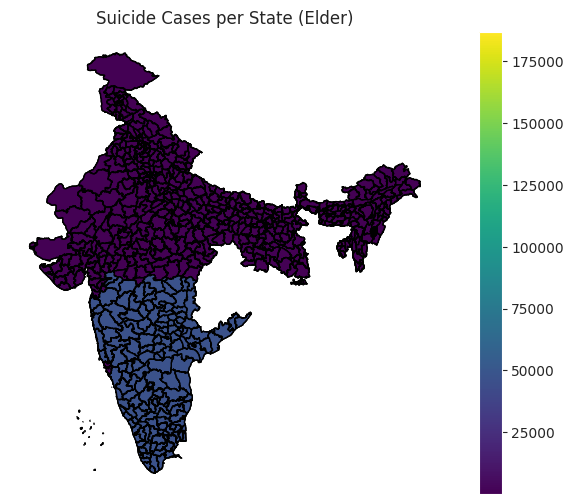

In [332]:
fig, ax = plt.subplots(figsize=(10, 6))

cmap = 'viridis'

ax = suicide_map_elder.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State (Elder)')

suicide_map_elder['coords'] = suicide_map_elder['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_map_elder['coords'] = [coords[0] for coords in suicide_map_elder['coords']]

#for idx, row in suicide_map_elder.iterrows():
   #ax.text(row.coords[0], row.coords[1], s=row['Total'],
           #horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_map_elder['Total'].min(), vmax= suicide_map_elder['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

plt.xticks([])
plt.yticks([])
plt.show()

<Axes: >

Text(0.5, 1.0, 'Suicide Cases per State (Young)')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Suicide Cases per State (Elder)')

[]

[]

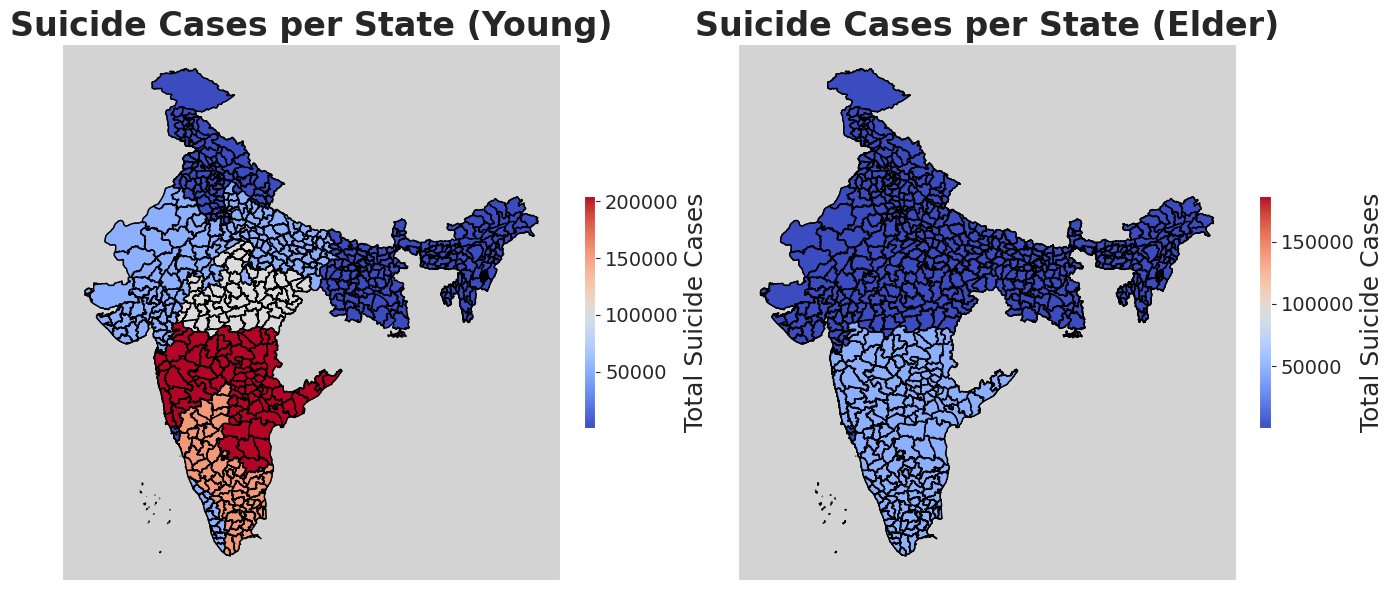

In [333]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# Assuming `sdata_agegroup` and `india` DataFrames are already defined

# Calculate the range for younger and elder groups
each_age_range = sdata_agegroup.shape[0] // sdata['Age_group'].nunique()

# Merge data for younger and elder groups
suicide_map_younger = india.merge(sdata_agegroup[:each_age_range * 2], left_on='statename', right_on='State')
suicide_map_elder = india.merge(sdata_agegroup[each_age_range * 2:], left_on='statename', right_on='State')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Configure color maps
cmap= 'coolwarm'  # You can choose any color map you prefer for elders

# Plotting the younger age group
suicide_map_younger.plot(ax=ax1, cmap=cmap, column='Total', scheme='equal_interval', edgecolor='black')
ax1.set_facecolor('lightgrey')
ax1.set_title('Suicide Cases per State (Young)', fontsize=24, fontweight='bold')

# Configure color normalization for younger group
norm_younger = mpl.colors.Normalize(vmin=suicide_map_younger['Total'].min(), vmax=suicide_map_younger['Total'].max())
sm_younger = plt.cm.ScalarMappable(cmap=cmap, norm=norm_younger)
sm_younger.set_array([])

# Create a custom color bar for younger group
cbar_younger = fig.colorbar(sm_younger, ax=ax1, fraction=0.02, pad=0.04)
cbar_younger.set_label('Total Suicide Cases', fontsize=18)
cbar_younger.ax.tick_params(labelsize=14)  # Customize tick label size

# Remove ticks on the axes for younger group
ax1.set_xticks([])
ax1.set_yticks([])

# Plotting the elder age group
suicide_map_elder.plot(ax=ax2, cmap=cmap, column='Total', scheme='equal_interval', edgecolor='black')
ax2.set_facecolor('lightgrey')
ax2.set_title('Suicide Cases per State (Elder)', fontsize=24, fontweight='bold')

# Configure color normalization for elder group
norm_elder = mpl.colors.Normalize(vmin=suicide_map_elder['Total'].min(), vmax=suicide_map_elder['Total'].max())
sm_elder = plt.cm.ScalarMappable(cmap=cmap, norm=norm_elder)
sm_elder.set_array([])

# Create a custom color bar for elder group
cbar_elder = fig.colorbar(sm_elder, ax=ax2, fraction=0.02, pad=0.04)
cbar_elder.set_label('Total Suicide Cases', fontsize=18)
cbar_elder.ax.tick_params(labelsize=14)  # Customize tick label size

# Remove ticks on the axes for elder group
ax2.set_xticks([])
ax2.set_yticks([])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#Genderwise Suicide Mapping

State-wise Suicide Mapping (Female)

Text(0.5, 1.0, 'Suicide Cases per State (Female)')

<ipython-input-334-a2f63857fc7a>:24: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



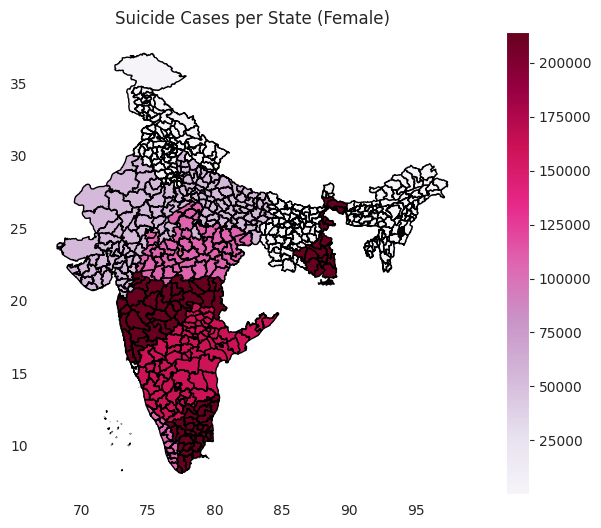

In [334]:
sdata_sex = sdata.groupby(['Gender','State']).sum()

suicide_map_female = IND.merge(sdata_sex[:sdata_sex.shape[0]//2], left_on= 'statename', right_on = 'State')
suicide_map_male = IND.merge(sdata_sex[sdata_sex.shape[0]//2:], left_on = 'statename', right_on = 'State')

fig, ax = plt.subplots(figsize=(10, 6))

cmap = 'PuRd'

ax = suicide_map_female.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State (Female)')

suicide_map_female['coords'] = suicide_map_female['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_map_female['coords'] = [coords[0] for coords in suicide_map_female['coords']]

#for idx, row in suicide_map_female.iterrows():
   #ax.text(row.coords[0], row.coords[1], s=row['Total'],
           #horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_map_female['Total'].min(), vmax= suicide_map_female['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

plt.show()

State-wise Suicide Mapping (Male)

Text(0.5, 1.0, 'Suicide Cases per State (Male)')

<ipython-input-335-bdcaffa7e2c7>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



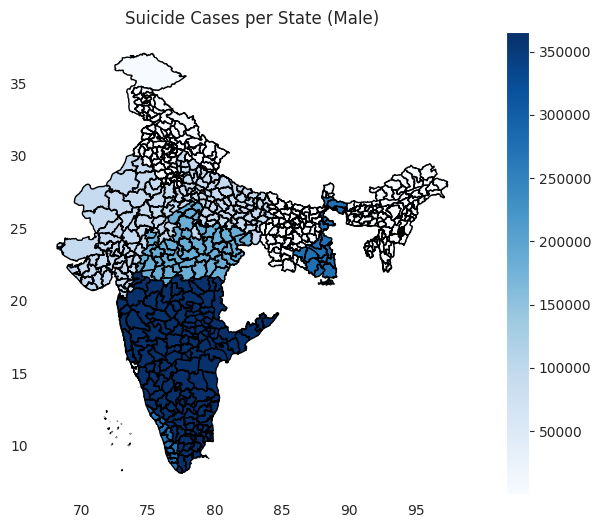

In [335]:
fig, ax = plt.subplots(figsize=(10, 6))

cmap = 'Blues'

ax = suicide_map_male.plot(ax=ax, cmap=cmap,column = 'Total',scheme = 'equal_interval',edgecolor = 'black')
ax.set_facecolor('white')
ax.set_title('Suicide Cases per State (Male)')

suicide_map_male['coords'] = suicide_map_male['geometry'].apply(lambda x: x.representative_point().coords[:])
suicide_map_male['coords'] = [coords[0] for coords in suicide_map_male['coords']]

#for idx, row in suicide_map_male.iterrows():
   #ax.text(row.coords[0], row.coords[1], s=row['Total'],
           #horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=suicide_map_male['Total'].min(), vmax= suicide_map_male['Total'].max())
n_cmap = cm.ScalarMappable(cmap= cmap, norm = norm)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)

plt.show()

Text(0.5, 1.0, 'Suicide Cases per State (Female)')

Text(0.5, 1.0, 'Suicide Cases per State (Male)')

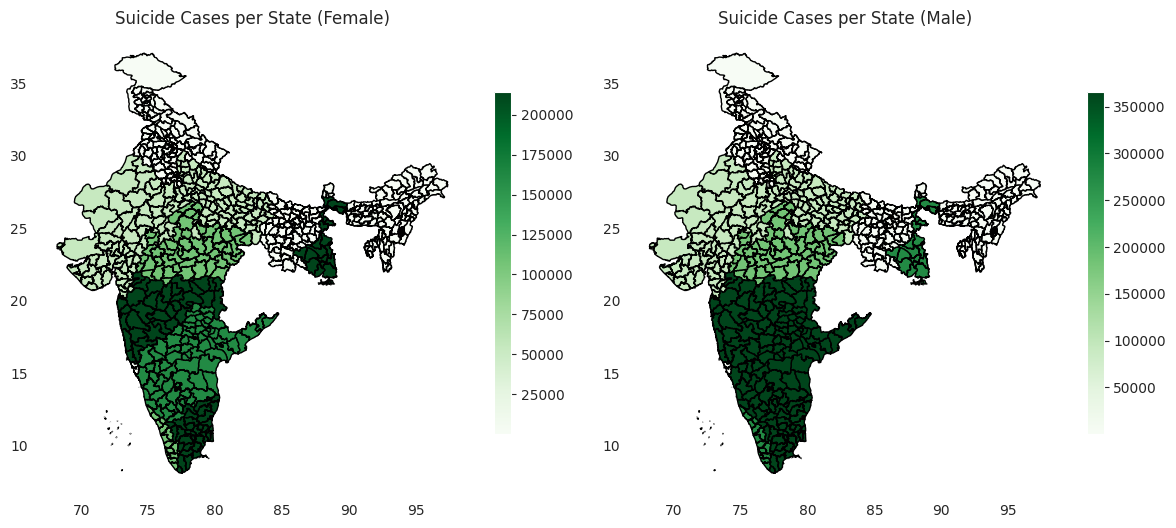

In [336]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Group data by Gender and State
sdata_sex = sdata.groupby(['Gender', 'State']).sum()

# Merge the data for females and males
suicide_map_female = IND.merge(sdata_sex[:sdata_sex.shape[0]//2], left_on='statename', right_on='State')
suicide_map_male = IND.merge(sdata_sex[sdata_sex.shape[0]//2:], left_on='statename', right_on='State')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Color map
cmap = 'Greens'

# Plot for female suicide cases
ax1 = suicide_map_female.plot(ax=ax1, cmap=cmap, column='Total', scheme='equal_interval', edgecolor='black')
ax1.set_facecolor('white')
ax1.set_title('Suicide Cases per State (Female)')

# Adding a colorbar for the female map
norm_female = mcolors.Normalize(vmin=suicide_map_female['Total'].min(), vmax=suicide_map_female['Total'].max())
n_cmap_female = cm.ScalarMappable(cmap=cmap, norm=norm_female)
n_cmap_female.set_array([])
fig.colorbar(n_cmap_female, ax=ax1, shrink=0.6)


# Plot for male suicide cases
ax2 = suicide_map_male.plot(ax=ax2, cmap=cmap, column='Total', scheme='equal_interval', edgecolor='black')
ax2.set_facecolor('white')
ax2.set_title('Suicide Cases per State (Male)')

# Adding a colorbar for the male map
norm_male = mcolors.Normalize(vmin=suicide_map_male['Total'].min(), vmax=suicide_map_male['Total'].max())
n_cmap_male = cm.ScalarMappable(cmap=cmap, norm=norm_male)
n_cmap_male.set_array([])
fig.colorbar(n_cmap_male, ax=ax2, shrink=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

# Suicide rates per population

In [337]:
print(sdata.columns)

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')


<Axes: >

<Axes: >

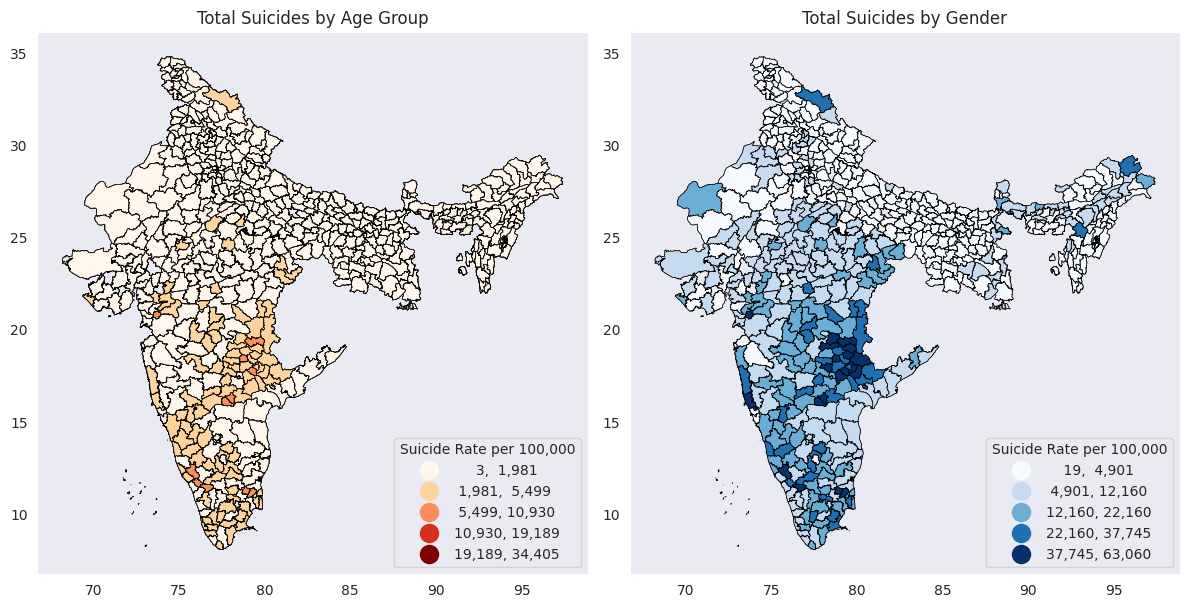

In [338]:
# Aggregate the suicide data by age group
age_agg = sdata.groupby(['State', 'Age_group']).agg({'Total': 'sum'}).reset_index()
gender_agg = sdata.groupby(['State', 'Gender']).agg({'Total': 'sum'}).reset_index()

# Merge the shapefile with the aggregated data
merged_data_age = IND.merge(age_agg, how='left', left_on='statename', right_on='State')
merged_data_gender = IND.merge(gender_agg, how='left', left_on='statename', right_on='State')

# Calculate the suicide rate per 100,000 population
merged_data_age['suicide_rate'] = merged_data_age['Total'] / merged_data_age['totalpopul'] * 100000
merged_data_gender['suicide_rate'] = merged_data_gender['Total'] / merged_data_gender['totalpopul'] * 100000

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Map for Total Suicides by Age Group
merged_data_age.plot(ax=ax1, column='suicide_rate', legend=True, cmap='OrRd',
                     scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.5,
                     legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax1.get_legend()
leg1.set_title('Suicide Rate per 100,000')
ax1.title.set_text("Total Suicides by Age Group")

# Map for Total Suicides by Gender
merged_data_gender.plot(ax=ax2, column='suicide_rate', legend=True, cmap='Blues',
                        scheme='natural_breaks', k=5, edgecolor='black', linewidth=0.5,
                        legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg2 = ax2.get_legend()
leg2.set_title('Suicide Rate per 100,000')
ax2.title.set_text("Total Suicides by Gender")

# Adjust layout
plt.tight_layout()
plt.show()